# 1. Defining the Question

## a) Specifying the Data Analytic Question

The objective is to determine whether an email is spam or not.

## b) Defining the Metric for Success

Successfully creating a model that accurately predicts whether an email is spam or not.

## c) Understanding the context

Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

## d) Recording the Experimental Design

1) Define the question, the metric for success, understanding the context and, recording the experimental design.

2) Import the libraries, disable future warnings, read and, explore the dataset provided.

3) Define the appropriateness of the available data to answer the given question.

4) Find and deal with outliers, anomalies and missing data within the dataset.

5) Perform univariate and bivariate analysis recording the observations.

6) Build the model using Naive Bayes Classifier.

7) Randomly partition each dataset into two parts i.e 80-20, 70-30, 60-40 sets.

8) Challenge the solution

9) Conclusions and Recommendations

## e) Data Relevance

A dataset containing the data with different aspects of emails has been provided for this project [Spam](https://archive.ics.uci.edu/ml/datasets/Spambase)

# 2. Reading the Data

In [76]:
#importing our necessary libraries
#---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import shapiro 
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Loading the Data from the source i.e. csv
# ---
spam = pd.read_csv('spam.csv', sep=',', names=['word_freq_make', 'word_freq_address', 'word_freq_all',
'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove',
'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people',
'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you',
'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415',
'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
'char_freq_[', 'char_freq_!', 'char_freq_$','char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
'capital_run_length_total', 'Type'])

# 3. Checking the Data

In [6]:
# Previewing the top of the dataset
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Type
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [7]:
# Previewing the bottom of the dataset
spam.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Type
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [8]:
# Checking the records of the dataset
print(spam.shape)

(4601, 58)


The dataset has 4601 rows and 58 columns

In [9]:
# Checking whether each column has an appropriate datatype
spam.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [10]:
# Check the statistical description of the continous variables 
spam.describe() 

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Type
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


# 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset.

# 5. Tidying the Dataset

In [11]:
#Disable future warnings by running this code
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.reset_option('all')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



In [12]:
# Check the columns of our dataset
spam.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [13]:
# Check for duplicates
#---
col_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'Type']

def checkIfDuplicates(col_names):
    ''' Check if given list of columns contains any duplicates '''
    if len(col_names) == len(set(col_names)):
        return False
    else:
        return True


result = checkIfDuplicates(col_names)

if result:
    print('Yes, list contains duplicates')
else:
    print('No duplicates found in list')    


No duplicates found in list


In [14]:
# Checking for missing values
spam.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

There are no missing values 

In [15]:
# Checking for duplicates
#---
spam.duplicated().sum()

391

There are 391 duplicates and they need to be dropped from the dataset.

In [16]:
# Dropping the duplicates
#---
spam = spam.drop_duplicates()

# Check if the changes have effected
spam.duplicated().sum()

0

All duplicates have been dropped.

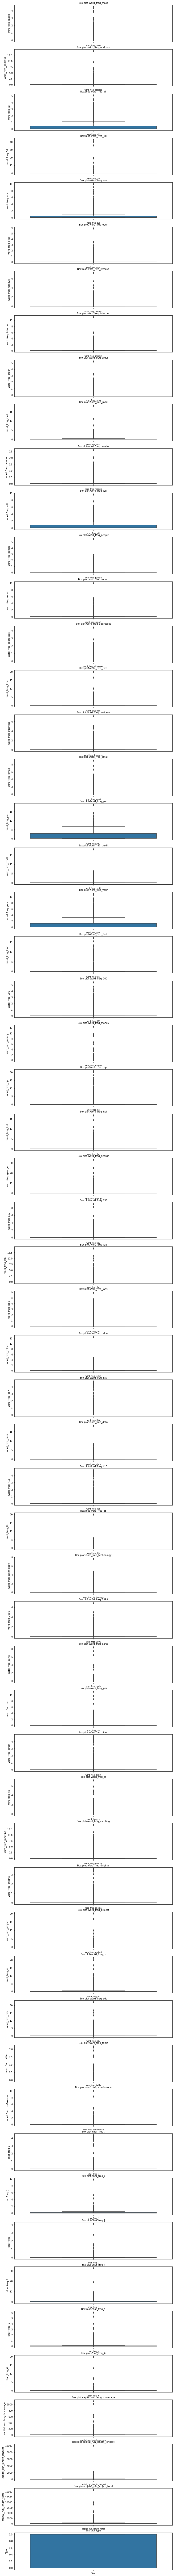

In [19]:
# Checking for Outliers
#---
fig, ax = plt.subplots(len(spam.columns), figsize=(12,200))

for i, col_val in enumerate(spam.columns):

  sns.boxplot(y= spam[col_val], ax=ax[i])
  ax[i].set_title('Box plot-{}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [21]:
# Checking for Anomalies
#---
for k, v in spam.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1

  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]

  perc = np.shape(v_col)[0] * 100.0 / np.shape(spam)[0]
  print("Columns %s outliers = %.2f%%" % (k, perc))

Columns word_freq_make outliers = 100.00%
Columns word_freq_address outliers = 100.00%
Columns word_freq_all outliers = 7.05%
Columns word_freq_3d outliers = 100.00%
Columns word_freq_our outliers = 10.67%
Columns word_freq_over outliers = 100.00%
Columns word_freq_remove outliers = 100.00%
Columns word_freq_internet outliers = 100.00%
Columns word_freq_order outliers = 100.00%
Columns word_freq_mail outliers = 17.77%
Columns word_freq_receive outliers = 100.00%
Columns word_freq_will outliers = 5.94%
Columns word_freq_people outliers = 100.00%
Columns word_freq_report outliers = 100.00%
Columns word_freq_addresses outliers = 100.00%
Columns word_freq_free outliers = 19.71%
Columns word_freq_business outliers = 100.00%
Columns word_freq_email outliers = 100.00%
Columns word_freq_you outliers = 1.38%
Columns word_freq_credit outliers = 100.00%
Columns word_freq_your outliers = 4.61%
Columns word_freq_font outliers = 100.00%
Columns word_freq_000 outliers = 100.00%
Columns word_freq_mone

# 6. Exploratory Analysis

In [22]:
# Checking whether each column has an appropriate datatype
spam.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

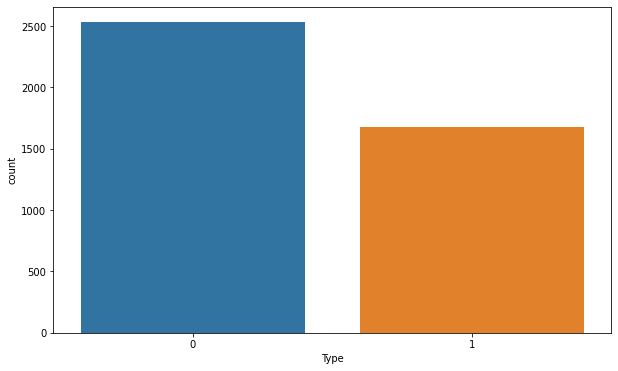

In [23]:
# Plotting a bar chart to show the frequency distribution of type
# 
fig,axes = plt.subplots(figsize=(10,6))
sns.countplot(spam['Type'])

In [25]:
# Checking the statistical description of the continuous variables
#---
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Type
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [26]:
# Let's compute the median
spam.median().sort_values(ascending=False)

capital_run_length_total      101.500
capital_run_length_longest     15.000
capital_run_length_average      2.297
word_freq_you                   1.360
word_freq_your                  0.290
word_freq_will                  0.190
char_freq_(                     0.073
char_freq_!                     0.016
word_freq_parts                 0.000
word_freq_cs                    0.000
word_freq_direct                0.000
word_freq_pm                    0.000
word_freq_make                  0.000
word_freq_1999                  0.000
word_freq_technology            0.000
word_freq_85                    0.000
word_freq_415                   0.000
word_freq_meeting               0.000
word_freq_re                    0.000
word_freq_original              0.000
word_freq_project               0.000
word_freq_857                   0.000
word_freq_edu                   0.000
word_freq_table                 0.000
word_freq_conference            0.000
char_freq_;                     0.000
char_freq_[ 

In [29]:
# Let's get the variance 
#---
spam.var().sort_values(ascending=False)

capital_run_length_total      382733.809130
capital_run_length_longest     39833.041719
capital_run_length_average      1098.747364
word_freq_george                   3.151798
word_freq_you                      3.128512
word_freq_hp                       2.810782
word_freq_3d                       1.829221
word_freq_your                     1.321010
word_freq_font                     1.147594
word_freq_re                       1.093937
word_freq_edu                      0.861755
word_freq_hpl                      0.820025
word_freq_will                     0.778829
char_freq_!                        0.711191
word_freq_free                     0.636061
word_freq_meeting                  0.630124
word_freq_our                      0.473076
word_freq_mail                     0.431174
word_freq_project                  0.417440
word_freq_lab                      0.332694
word_freq_data                     0.323927
word_freq_email                    0.292825
word_freq_650                   

In [27]:
# Let's get the skewness
#---
spam.skew().sort_values(ascending=False)

char_freq_#                   31.500180
capital_run_length_longest    31.205495
word_freq_3d                  27.209539
word_freq_parts               27.078694
capital_run_length_average    22.760655
char_freq_[                   21.271982
word_freq_table               19.298485
word_freq_conference          18.871757
char_freq_!                   18.337278
word_freq_project             18.196824
word_freq_85                  16.001762
word_freq_money               15.556682
word_freq_credit              15.430174
char_freq_(                   14.002666
word_freq_telnet              13.514852
word_freq_address             13.464664
char_freq_;                   13.355885
word_freq_data                13.069355
word_freq_pm                  11.762303
word_freq_lab                 11.683591
word_freq_report              11.564142
word_freq_cs                  11.468806
char_freq_$                   10.608970
word_freq_857                 10.432463
word_freq_415                 10.339838


In [28]:
# Let's get the kurtosis
#---
spam.kurt().sort_values(ascending=False)

capital_run_length_longest    1471.215610
char_freq_#                   1238.321018
word_freq_parts                836.229272
word_freq_3d                   788.370058
char_freq_[                    664.620378
capital_run_length_average     614.399885
char_freq_!                    579.438464
word_freq_conference           492.146945
word_freq_85                   491.541633
word_freq_project              449.017717
word_freq_table                431.309247
word_freq_credit               424.685771
char_freq_(                    404.370138
word_freq_money                340.175773
word_freq_address              306.685973
word_freq_telnet               302.369897
word_freq_data                 290.736221
word_freq_report               219.645155
word_freq_pm                   205.959198
char_freq_;                    200.449787
word_freq_lab                  189.408655
char_freq_$                    188.462692
word_freq_internet             167.550219
word_freq_cs                   166

In [31]:
# Building a correlation matrix
#---
correlation = spam.corr()
correlation

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Type
word_freq_make,1.000000,0.034012,0.063207,0.005388,0.021740,0.055067,0.011061,-0.004370,0.103842,0.040829,...,-0.027248,-0.019636,-0.034784,0.059184,0.101957,-0.009149,0.044783,0.059128,0.084127,0.129194
word_freq_address,0.034012,1.000000,0.027789,-0.008947,0.036975,0.005526,0.077374,0.013706,0.053426,0.184304,...,0.014735,-0.028348,-0.019436,0.031858,0.044354,0.030669,0.029355,0.053870,0.034590,0.100651
word_freq_all,0.063207,0.027789,1.000000,-0.019901,0.065676,0.066547,0.028581,0.007221,0.077561,0.025138,...,-0.036778,-0.024545,-0.035805,0.097316,0.072944,-0.004520,0.095671,0.092513,0.051961,0.172350
word_freq_3d,0.005388,-0.008947,-0.019901,1.000000,0.000256,-0.009163,0.014289,0.003801,-0.001040,-0.003845,...,-0.000028,-0.011443,-0.007514,-0.003867,0.008273,0.000134,0.005754,0.022105,0.023785,0.056383
word_freq_our,0.021740,0.036975,0.065676,0.000256,1.000000,0.041392,0.135957,0.023411,0.014483,0.027233,...,-0.035049,-0.054580,-0.027988,0.019203,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230074
word_freq_over,0.055067,0.005526,0.066547,-0.009163,0.041392,1.000000,0.046868,0.079704,0.097037,0.010099,...,-0.021744,-0.011584,-0.016729,0.058121,0.105927,0.020413,-0.013554,0.065709,0.063403,0.212311
word_freq_remove,0.011061,0.077374,0.028581,0.014289,0.135957,0.046868,1.000000,0.033692,0.049238,0.055695,...,-0.034080,-0.061318,-0.029466,0.050992,0.067236,0.049306,0.039174,0.050825,-0.017081,0.334456
word_freq_internet,-0.004370,0.013706,0.007221,0.003801,0.023411,0.079704,0.033692,1.000000,0.106890,0.079045,...,-0.028976,-0.042751,-0.021383,0.029031,0.053569,-0.008121,0.009977,0.035603,0.036895,0.200666
word_freq_order,0.103842,0.053426,0.077561,-0.001040,0.014483,0.097037,0.049238,0.106890,1.000000,0.123366,...,-0.015004,-0.037377,0.017321,0.035937,0.152457,-0.002075,0.110788,0.166299,0.233198,0.221454
word_freq_mail,0.040829,0.184304,0.025138,-0.003845,0.027233,0.010099,0.055695,0.079045,0.123366,1.000000,...,0.006772,-0.004960,0.003800,0.031602,0.077405,0.034482,0.073128,0.101546,0.078587,0.131686


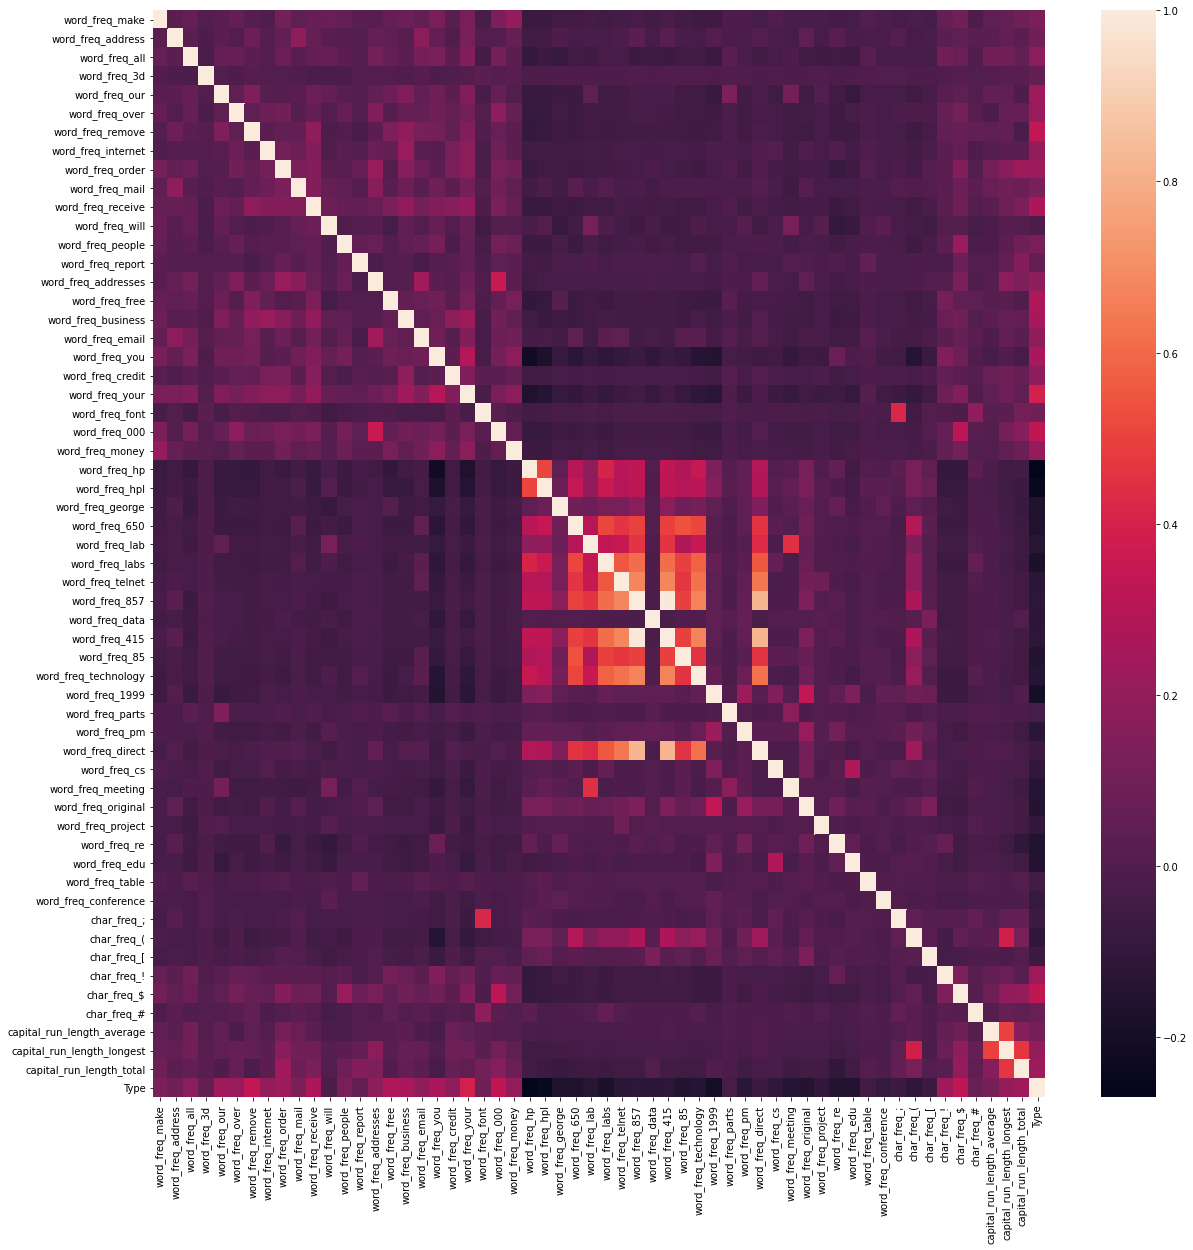

In [34]:
# Creating a heatmap to represent the magnitude of the correlation variable
#---
f, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(spam.corr())

# 7. Implementing the Solution

In [37]:
# Compute the VIF
#---
# Create the independent variables
X = spam.iloc[:,:-1]
  
# VIF dataframe
vif = pd.DataFrame()
vif["feature"] = X.columns
  
# Calculating the VIF for each column
vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif)

                       feature         VIF
0               word_freq_make    1.229407
1            word_freq_address    1.173538
2                word_freq_all    1.400882
3                 word_freq_3d    1.006264
4                word_freq_our    1.324950
5               word_freq_over    1.192613
6             word_freq_remove    1.215999
7           word_freq_internet    1.173639
8              word_freq_order    1.314221
9               word_freq_mail    1.275207
10           word_freq_receive    1.293204
11              word_freq_will    1.452327
12            word_freq_people    1.179703
13            word_freq_report    1.078906
14         word_freq_addresses    1.391345
15              word_freq_free    1.174359
16          word_freq_business    1.332468
17             word_freq_email    1.326938
18               word_freq_you    2.108006
19            word_freq_credit    1.115386
20              word_freq_your    1.924680
21              word_freq_font    1.311079
22         

As seen, word_freq_857 and word_freq_415 have a very high multicollinearity and because they're the only highly correlated variables, they will be removed. If we had many highly correlated variables, we would have performed an analysis using PCA which is a good model designed for highly correlated variables.

In [38]:
# Dropping the 2 columns with high multicollinearity
#---
spam.drop(['word_freq_857', 'word_freq_415'], axis=1, inplace=True)
spam.shape

(4210, 56)

The two variables have been dropped as indicated by the number of columns reducing to 56 from the initial 58 columns.

In [39]:
# Defining our dependent and independent variables
#---
X = spam.iloc[:,:-1]
y = spam.iloc[:,-1]

In [40]:
# Training test split
#---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [41]:
# Feature scaling
#---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
# Import and train LDA
lda = LDA()
lda = lda.fit(X, y)
lda_feat = lda.transform(X)

# Creating lda coefficients
lda.coef_

# Create a dataframe to get the column names
Important_features = pd.DataFrame(index=X.columns.values, data=lda.coef_[0].T)
Important_features.sort_values(0, ascending=False)

,0
char_freq_$,2.376093
word_freq_remove,1.967756
word_freq_000,1.554823
word_freq_receive,1.343132
word_freq_over,1.076594
word_freq_internet,0.804692
word_freq_free,0.789185
word_freq_our,0.746832
word_freq_direct,0.721612
word_freq_money,0.692590


## 7.1) Modelling

### 7.1.1) Gaussian Naive Bayes Classifier

The preferred model to use is the Gaussian Naive Bayes Classifier given our dataset has continous variables.

### 7.1.2) Split the data by 80-20 sets

In [ ]:
# Preview the dataset
spam.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
871,1,1,female,47.0,1,1,52.5542,D35,S
872,0,1,male,33.0,0,0,5.0000,B51 B53 B55,S
879,1,1,female,56.0,0,1,83.1583,C50,C
887,1,1,female,19.0,0,0,30.0000,B42,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [44]:
# Splitting our dataset into its attributes and labels
# We performed LDA and got coefficients therefore we shall use those
# above 0.6 preferably the first 10.
# ---
X = spam[['char_freq_$', 'word_freq_remove', 'word_freq_000', 
          'word_freq_receive', 'word_freq_over', 'word_freq_internet', 
          'word_freq_free', 'word_freq_our', 'word_freq_money', 'word_freq_order']]
y = spam.iloc[:,-1].values

In [46]:
# Conducting a normalty test on our data using shapiro-wilk test
#--- 
stat, p = shapiro(spam)
print(stat,p)
print('statistics=%.3f, p=%.3f' % (stat,p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian')

else:
  print('Sample does not look Gaussian')

0.03758198022842407 0.0
statistics=0.038, p=0.000
Sample does not look Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


We are conducting a normality test to select the representative value of the dataset to get the right interpretation.

In [50]:
# Our data does not have a normal distribution therefore we need to normalize it
# Create a normalizer object

normalizer = Normalizer(norm='l1')
normalizer.fit_transform(X)

array([[0.        , 0.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.0861244 , 0.10047847, 0.20574163, ..., 0.06698565, 0.20574163,
        0.        ],
       [0.04366398, 0.0450878 , 0.2752729 , ..., 0.2918842 , 0.01423825,
        0.1518747 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [51]:
# Train Test Split
# ---
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [52]:
# Training our model
# ---
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

GaussianNB()

In [53]:
# Make predictions on our test data
# ---
y_pred = gaussian.predict(X_test)

# create a comparison dataframe
# 
comparison_frame = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
comparison_frame.tail()

,Actual,Predicted
837,1,1
838,1,1
839,0,0
840,0,0
841,0,0


In [54]:
# Evaluate performance of our model
# 
np.mean(y_pred == y_test)

0.827790973871734

In [55]:
# Evaluating the Algorithm
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score
# are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics
# can be used to calculate these metrics. 
# ---
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[465  30]
 [115 232]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.87       495
           1       0.89      0.67      0.76       347

    accuracy                           0.83       842
   macro avg       0.84      0.80      0.81       842
weighted avg       0.84      0.83      0.82       842



Our model gave an accuracy of 83% which is pretty good.

### 7.1.3) Split the data by 70-30 sets

In [56]:
# Splitting our dataset into its attributes and labels
# We performed LDA and got coefficients therefore we shall use those
# above 0.6 preferably the first 10.
# ---
X = spam[['char_freq_$', 'word_freq_remove', 'word_freq_000', 
          'word_freq_receive', 'word_freq_over', 'word_freq_internet', 
          'word_freq_free', 'word_freq_our', 'word_freq_money', 'word_freq_order']]
y = spam.iloc[:,-1].values

In [57]:
# Conducting a normalty test on our data using shapiro-wilk test
#--- 
stat, p = shapiro(spam)
print(stat,p)
print('statistics=%.3f, p=%.3f' % (stat,p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian')

else:
  print('Sample does not look Gaussian')

0.03758198022842407 0.0
statistics=0.038, p=0.000
Sample does not look Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [69]:
# Our data does not have a normal distribution therefore we need to normalize it
# Create a normalizer object

normalizer2 = Normalizer(norm='l1')
normalizer2.fit_transform(X)

array([[0.        , 0.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.0861244 , 0.10047847, 0.20574163, ..., 0.06698565, 0.20574163,
        0.        ],
       [0.04366398, 0.0450878 , 0.2752729 , ..., 0.2918842 , 0.01423825,
        0.1518747 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [59]:
# Train Test Split
# ---
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [70]:
# Training our model
# ---
gaussian2 = GaussianNB()
gaussian2.fit(X_train, y_train)

GaussianNB()

In [63]:
# Make predictions on our test data
# ---
y_pred2 = gaussian.predict(X_test)

# create a comparison dataframe
# 
comparison_frame1 = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred2.flatten()})
comparison_frame1.tail()

,Actual,Predicted
1258,1,1
1259,1,1
1260,1,1
1261,0,0
1262,1,1


In [64]:
# Evaluate performance of our model
#---
np.mean(y_pred2 == y_test)

0.8392715756136183

In [65]:
# Evaluating the Algorithm
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score
# are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics
# can be used to calculate these metrics. 
# ---
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[692  45]
 [158 368]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       737
           1       0.89      0.70      0.78       526

    accuracy                           0.84      1263
   macro avg       0.85      0.82      0.83      1263
weighted avg       0.85      0.84      0.84      1263



The model gave an accuracy of 84% which is slightly higher than the previous one.

### 7.1.4) Split the data by 60-40 sets

In [66]:
# Splitting our dataset into its attributes and labels
# We performed LDA and got coefficients therefore we shall use those
# above 0.6 preferably the first 10.
# ---
X = spam[['char_freq_$', 'word_freq_remove', 'word_freq_000', 
          'word_freq_receive', 'word_freq_over', 'word_freq_internet', 
          'word_freq_free', 'word_freq_our', 'word_freq_money', 'word_freq_order']]
y = spam.iloc[:,-1].values

In [67]:
# Conducting a normalty test on our data using shapiro-wilk test
#--- 
stat, p = shapiro(spam)
print(stat,p)
print('statistics=%.3f, p=%.3f' % (stat,p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian')

else:
  print('Sample does not look Gaussian')

0.03758198022842407 0.0
statistics=0.038, p=0.000
Sample does not look Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [68]:
# Our data does not have a normal distribution therefore we need to normalize it
# Create a normalizer object

normalizer = Normalizer(norm='l1')
normalizer.fit_transform(X)

array([[0.        , 0.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.0861244 , 0.10047847, 0.20574163, ..., 0.06698565, 0.20574163,
        0.        ],
       [0.04366398, 0.0450878 , 0.2752729 , ..., 0.2918842 , 0.01423825,
        0.1518747 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [71]:
# Train Test Split
# ---
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)

In [72]:
# Training our model
# ---
gaussian3 = GaussianNB()
gaussian3.fit(X_train, y_train)

GaussianNB()

In [73]:
# Make predictions on our test data
# ---
y_pred3 = gaussian.predict(X_test)

# create a comparison dataframe
# 
comparison_frame2 = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred3.flatten()})
comparison_frame2.tail()

,Actual,Predicted
1679,0,0
1680,1,0
1681,0,0
1682,0,0
1683,0,0


In [74]:
# Evaluate performance of our model
#---
np.mean(y_pred3 == y_test)

0.8390736342042755

In [75]:
# Evaluating the Algorithm
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score
# are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics
# can be used to calculate these metrics. 
# ---
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[932  62]
 [209 481]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       994
           1       0.89      0.70      0.78       690

    accuracy                           0.84      1684
   macro avg       0.85      0.82      0.83      1684
weighted avg       0.85      0.84      0.84      1684



We got an accuracy of 84% just like in our previous model

# 8. Challenging the solution

## 8.1) Random Forest Classifier

We shall use Random Forest Classifier to improve the predictive accuracy of the dataset.

In [77]:
X = spam[['char_freq_$', 'word_freq_remove', 'word_freq_000', 
          'word_freq_receive', 'word_freq_over', 'word_freq_internet', 
          'word_freq_free', 'word_freq_our', 'word_freq_money', 'word_freq_order']]

y = spam.iloc[:,-1].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


forest = RandomForestClassifier(random_state=42)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

# Create a comparison dataframe
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,842.000000,842.000000
mean,0.412114,0.413302
std,0.492508,0.492719
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [78]:
# Evaluating the Algorithm
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score
# are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics
# can be used to calculate these metrics. 
# ---
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[440  55]
 [ 54 293]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       495
           1       0.84      0.84      0.84       347

    accuracy                           0.87       842
   macro avg       0.87      0.87      0.87       842
weighted avg       0.87      0.87      0.87       842



The accuracy score has increased to 87%.

# Conclusion

1. Our model improve it's performance after using Random Forest classifier. In fact, it gave a very high accuracy score of 87%.

2. The data proved to have good accuracy scores every time it was split further.

3. Splitting the data by 60-40 sets proved to be the best as it's accuracy was 84%.

# Recommendations

1. Splitting the data by 60-40 sets proved to be the best therefore, it would be recommended to use it.

2. We recommend using random forest classifier as it returned a very high accuracy score.

# 9. Follow up questions

## a). Did we have the right data?

Yes. There was a satisfactory sample size that explored key factors which helped to predict whether an email is spam or not. 

## b). Do we need other data to answer our question?

Since the data was adequate, there is no need for more as the question was answered.

## c). Did we have the right question?

Yes. It was possible to create models that made predictions of whether an email is spam or not.